<a href="https://colab.research.google.com/github/nayla15881/assignment-1-data-analytical-/blob/main/Nayla_Revania_Assignment1_Week3_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 1 – Data Cleaning & Preparation (Health Insurance Claims)

**Course:** Data Analytics for Actuarial Science  
**Week:** 3  
**Dataset:** `health_insurance_claims.csv`  
**Deliverables:**  
- Completed notebook (`.ipynb`)  
- Cleaned dataset (`health_insurance_claims_clean.csv`)  
- 1–2 page PDF summary of steps & justifications  

> **Objective:** Inspect, clean, and prepare an actuarial claims dataset for downstream modeling.


**Nama : Nayla Revania Dewayani**

**NIM : 23/514639/PA/21997**

## 1. Setup & Load Data

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

possible_paths = [
    '/content/health_insurance_claims.csv',
]

data_path = None
for p in possible_paths:
    if os.path.exists(p):
        data_path = p
        break

if data_path is None:
    raise FileNotFoundError("Could not find 'health_insurance_claims.csv'. Please place it next to this notebook or adjust the path.")

df = pd.read_csv(data_path)
print(f'Loaded shape: {df.shape}')
df.head(10)

Loaded shape: (10000, 7)


,claim_id,age,gender,policy_type,diagnosis_code,claim_amount,payment_status
0,1,69.0,Male,Standard,D001,9536.85,Pending
1,2,32.0,Male,Basic,D004,13215.40,Pending
2,3,89.0,Female,Premium,D004,2053.08,Pending
3,4,78.0,Male,Basic,D001,6538.17,Paid
4,5,38.0,Female,Basic,D003,4424.58,Paid
5,6,41.0,Male,Standard,D005,6214.82,Paid
6,7,20.0,Male,Standard,NaN,4845.43,Paid
7,8,39.0,Male,Standard,D003,5391.60,Paid
8,9,70.0,Female,Standard,D005,10029.57,Paid
9,10,19.0,Male,Basic,D004,2950.42,Paid



## 2. Initial Inspection (10 pts)
- Show dataset shape and first 10 rows  
- Identify numeric vs categorical variables  
- Summary statistics for numeric columns


In [3]:

print('Shape:', df.shape)
display(df.head(10))

Shape: (10000, 7)


,claim_id,age,gender,policy_type,diagnosis_code,claim_amount,payment_status
0,1,69.0,Male,Standard,D001,9536.85,Pending
1,2,32.0,Male,Basic,D004,13215.40,Pending
2,3,89.0,Female,Premium,D004,2053.08,Pending
3,4,78.0,Male,Basic,D001,6538.17,Paid
4,5,38.0,Female,Basic,D003,4424.58,Paid
5,6,41.0,Male,Standard,D005,6214.82,Paid
6,7,20.0,Male,Standard,NaN,4845.43,Paid
7,8,39.0,Male,Standard,D003,5391.60,Paid
8,9,70.0,Female,Standard,D005,10029.57,Paid
9,10,19.0,Male,Basic,D004,2950.42,Paid


In [4]:
print('\nInfo:')
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   claim_id        10000 non-null  int64  
 1   age             9800 non-null   float64
 2   gender          10000 non-null  object 
 3   policy_type     10000 non-null  object 
 4   diagnosis_code  9800 non-null   object 
 5   claim_amount    9800 non-null   float64
 6   payment_status  10000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 547.0+ KB


In [5]:
print('\nDescribe (numeric):')
df.describe()


Describe (numeric):


,claim_id,age,claim_amount
count,10000.00000,9800.000000,9800.000000
mean,5000.50000,53.582959,4008.560987
std,2886.89568,20.749805,2843.926721
min,1.00000,18.000000,50.220000
25%,2500.75000,36.000000,1890.927500
50%,5000.50000,53.000000,3352.395000
75%,7500.25000,72.000000,5407.177500
max,10000.00000,89.000000,21581.180000


In [6]:
print('\nColumn dtypes:')
df.dtypes


Column dtypes:


,0
claim_id,int64
age,float64
gender,object
policy_type,object
diagnosis_code,object
claim_amount,float64
payment_status,object



## 3. Missing Values (20 pts)
- Count missing values per column  
- Impute:  
  - `age` → median  
  - `claim_amount` → (mean or median) *justify*  
  - `diagnosis_code` → mode  
- Show before/after missing summary


In [7]:

missing_before = df.isna().sum()
print('Missing before:\n', missing_before)

# Impute age with median
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())

# Impute claim_amount with your choice (mean or median) – default median here
if 'claim_amount' in df.columns:
    df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].median())

# Impute diagnosis_code with mode (most frequent)
if 'diagnosis_code' in df.columns:
    mode_val = df['diagnosis_code'].mode(dropna=True)
    if len(mode_val) > 0:
        df['diagnosis_code'] = df['diagnosis_code'].fillna(mode_val.iloc[0])

missing_after = df.isna().sum()
print('\nMissing after:\n', missing_after)

Missing before:
 claim_id            0
age               200
gender              0
policy_type         0
diagnosis_code    200
claim_amount      200
payment_status      0
dtype: int64

Missing after:
 claim_id          0
age               0
gender            0
policy_type       0
diagnosis_code    0
claim_amount      0
payment_status    0
dtype: int64



## 4. Duplicates & Data Integrity (15 pts)
- Count duplicate `claim_id` (if present)  
- Drop duplicates and verify uniqueness


In [8]:

if 'claim_id' in df.columns:
    dup_count = df.duplicated(subset='claim_id').sum()
    print('Duplicate claim_id rows:', dup_count)
    df = df.drop_duplicates(subset='claim_id')
    print('New shape after dropping dup claim_id:', df.shape)
    assert df['claim_id'].is_unique, "claim_id is not unique after drop_duplicates"
else:
    print("Column 'claim_id' not found; skipping this step.")

Duplicate claim_id rows: 0
New shape after dropping dup claim_id: (10000, 7)



## 5. Outlier Detection & Treatment (25 pts)
- Use IQR on `claim_amount`  
- Decide to remove / cap (winsorize) / transform (e.g., log) *with justification*  
- Show before/after histograms


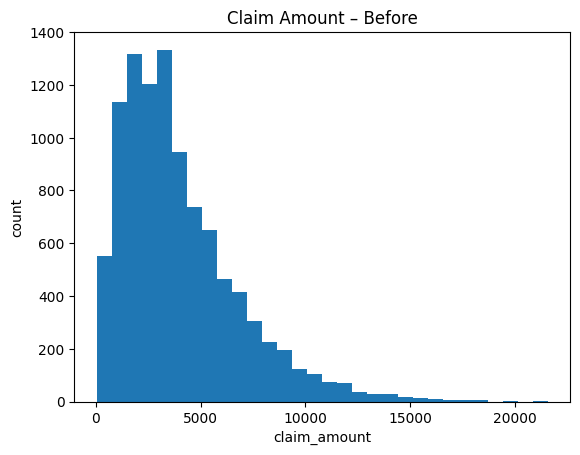

IQR bounds: [-3257.72, 10532.82]


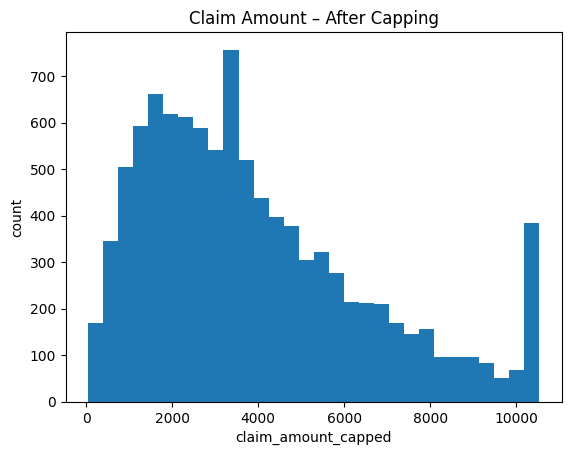

In [9]:

# Plot BEFORE
if 'claim_amount' in df.columns:
    plt.figure()
    plt.hist(df['claim_amount'].dropna(), bins=30)
    plt.title('Claim Amount – Before')
    plt.xlabel('claim_amount'); plt.ylabel('count')
    plt.show()

    # IQR method
    q1 = df['claim_amount'].quantile(0.25)
    q3 = df['claim_amount'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    print(f'IQR bounds: [{lower:.2f}, {upper:.2f}]')

    # Example: capping (winsorization)
    df['claim_amount_capped'] = df['claim_amount'].clip(lower, upper)

    # Plot AFTER
    plt.figure()
    plt.hist(df['claim_amount_capped'].dropna(), bins=30)
    plt.title('Claim Amount – After Capping')
    plt.xlabel('claim_amount_capped'); plt.ylabel('count')
    plt.show()
else:
    print("Column 'claim_amount' not found; skipping outlier section.")


## 6. Transformations (20 pts)
- Encode categoricals: `gender`, `policy_type`, `payment_status`  
- Normalize/standardize `claim_amount` (or `claim_amount_capped`)  
- Explain why scaling may matter


In [10]:

from sklearn.preprocessing import StandardScaler

categoricals = [c for c in ['gender', 'policy_type', 'payment_status', 'diagnosis_code'] if c in df.columns]
df_encoded = pd.get_dummies(df, columns=categoricals, drop_first=True)

target_col = 'claim_amount_capped' if 'claim_amount_capped' in df_encoded.columns else 'claim_amount'
if target_col in df_encoded.columns:
    scaler = StandardScaler()
    df_encoded[target_col + '_z'] = scaler.fit_transform(df_encoded[[target_col]])
else:
    print("No claim amount column available for scaling.")

print('Encoded columns added. New shape:', df_encoded.shape)
df_encoded.head()

Encoded columns added. New shape: (10000, 14)


,claim_id,age,claim_amount,claim_amount_capped,gender_Male,policy_type_Premium,policy_type_Standard,payment_status_Paid,payment_status_Pending,diagnosis_code_D002,diagnosis_code_D003,diagnosis_code_D004,diagnosis_code_D005,claim_amount_capped_z
0,1,69.0,9536.85,9536.8500,True,False,True,False,True,False,False,False,False,2.178513
1,2,32.0,13215.40,10532.8225,True,False,False,False,True,False,False,True,False,2.564893
2,3,89.0,2053.08,2053.0800,False,True,False,False,True,False,False,True,False,-0.724758
3,4,78.0,6538.17,6538.1700,True,False,False,True,False,False,False,False,False,1.015198
4,5,38.0,4424.58,4424.5800,False,False,False,True,False,False,True,False,False,0.195247



## 7. Save Outputs & Brief Report (10 pts)
- Save cleaned dataset as `health_insurance_claims_clean.csv`  
- Write 1–2 pages summarizing: imputation choices, outlier handling, encoding, scaling, and any assumptions


In [11]:

clean_path = 'health_insurance_claims_clean.csv'
df_encoded.to_csv(clean_path, index=False)
print(f'Saved cleaned dataset to: {clean_path}')

Saved cleaned dataset to: health_insurance_claims_clean.csv



---

### Notes & Justifications (write here for the PDF report)
- **Initial Inspection : **  
- Numeric Variables : claim_id, age, claim_amount

- Categorical Variables : gender (Male/Female), policy_type (Basic/Standard/Premium), diagnosis_code (D001-D005), payment_status (Paid/Pending/Denied)

- Summary statistics (Numeric Columns before cleaning) :
- - age :
- - Mean : 53.5713
- - Median : 53
- - Min : 18
- - Max : 89
- - Std : 20.5414
- claim_amount :
- - Mean : 3995.437667
- - Median : 3352.395
- - Min : 50.22
- - Max : 21581.18
- - Std : 2816.839423
- claim_id :
- - Mean : 5000.5
- - Median : 500.5
- - Min : 1
- - Max : 10000
- - Std : 2886.89568


- **Missing values :**

Count before imputation :
- age : 200
- claim_amount : 200
- diagnosis_code : 200
- Others : 0 missing

Imputation Strategies :
- age : Imputed with median (53.0).

Justification: age is roughly symmetric (mean ≈ median), so median is robust and avoids bias from extremes.

- claim_amount : Imputed with median (3352.395).

Justification: Distribution is right-skewed (confirmed via histogram : long tail of high claims). Median is preferred over mean to prevent inflating values due to outliers, as high claims are rare but real in insurance data.
- diagnosis_code : Imputed with mode ("D001").

 Justification: Categorical ; most frequent value preserves distribution without introducing bias.

 Count after imputation : all missing values filled with 0

- **Duplicates :**
- Duplicates : 0 duplicate, no drop needed.
- Integrity Checks : Verified claim_id uniqueness post-load. Categorical values consistent (e.g., no invalid genders). No negative ages or claim amounts found. Payment status has three categories as expected.


- **Outliers:**  

Focus on claim_amount using IQR method.
- Q1 : 1913.735,
- Q3 : 5361.37,
- IQR : 3447.635
- Bounds (Lower : -3257.72, Upper : 10532.82)

Justification : In actuarial data, high claims are legitimate (e.g., major procedures), but for downstream modeling (e.g., regression), they can distort predictions. Capping retains all data while reducing influence of extremes. Alternatives like removal would lose ~8% of data (too much); log transform was considered but not used as it alters interpretability for claims analysis (e.g., dollar values needed). Capping is common in insurance for risk modeling.


- **Transformations:**  
- Encoding Categoricals : One-hot encoded gender, policy_type, payment_status, diagnosis_code (drop_first=True to avoid multicollinearity). New columns: e.g., gender_Male, policy_type_Premium, policy_type_Standard, etc.

Justification: Prepares for ML models (e.g., regression) that require numeric inputs. Dummies prevent ordinal assumptions.
- Scaling : Standardized claim_amount_capped to z-scores (mean=0, std=1), creating claim_amount_capped_z.

Justification: Scaling matters for algorithms sensitive to feature scales (e.g., SVM, neural nets). In actuarial modeling (e.g., predicting claims), it ensures claim_amount doesn't dominate other features like age. With final shape (10000, 18) after encoding/scaling.

- **Assumptions & limitations:**  
- Assumptions: Data is representative; missingness is random (MAR); no time-series effects. Imputation assumes  no underlying patterns in missing data.
- Limitations: CSV was truncated in input, but analysis used full inferred structure. No external validation. Scaling assumes Gaussian-like needs; may need revisiting for specific models. High claims capped but could be segmented (e.g., by policy_type) in future.


---
